# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [71]:
print(f"PRINT LOG BELOW")
number = 0
for city in cities:
    target_city = city
    base_url = ('http://api.openweathermap.org/data/2.5/find?q={0}&units=imperial&appid={1}').format(target_city,weather_api_key)
    city_weather_json = requests.get(base_url).json()
    
    if city_weather_json['count'] == 0:
        print(f"------------------------------")
        print(f"Target City {target_city} Not Found - Skipping!")
        print(f"------------------------------")
    else: 
        number = number + 1
        name = city_weather_json['list'][0]['name']
        print(f'Processed City Number {number} | {name} ')
    

PRINT LOG BELOW
Processed City Number 1 | Mataura 
Processed City Number 2 | Bredasdorp 
Processed City Number 3 | Sorland 
Processed City Number 4 | Tura 
Processed City Number 5 | Hobart 
Processed City Number 6 | Qena 
Processed City Number 7 | Punta Arenas 
------------------------------
Target City taolanaro Not Found - Skipping!
------------------------------
Processed City Number 8 | Washington 
Processed City Number 9 | Erzin 
Processed City Number 10 | Kodiak 
Processed City Number 11 | Wilaya de l'Adrar 
------------------------------
Target City dolbeau Not Found - Skipping!
------------------------------
Processed City Number 12 | Kloulklubed 
------------------------------
Target City attawapiskat Not Found - Skipping!
------------------------------
Processed City Number 13 | Saldanha 
Processed City Number 14 | Mackay 
------------------------------
Target City vaitupu Not Found - Skipping!
------------------------------
Processed City Number 15 | Tuatapere 
Processed Cit

Processed City Number 175 | Mar del Plata 
Processed City Number 176 | Kyzyl-Suu 
Processed City Number 177 | Teahupoo 
Processed City Number 178 | Ponta do Sol 
Processed City Number 179 | Raudeberg 
Processed City Number 180 | Hofn 
Processed City Number 181 | Korla 
Processed City Number 182 | Cayenne 
Processed City Number 183 | Shubarkuduk 
Processed City Number 184 | San Carlos de Bariloche 
Processed City Number 185 | Provideniya 
Processed City Number 186 | Panaba 
Processed City Number 187 | Severo-Kurilsk 
Processed City Number 188 | Amboasary 
Processed City Number 189 | Catio 
Processed City Number 190 | Podkletnoye 
Processed City Number 191 | Punta Alta 
Processed City Number 192 | Olavarria 
Processed City Number 193 | Tailai 
Processed City Number 194 | Codrington 
Processed City Number 195 | Seoul 
------------------------------
Target City meyungs Not Found - Skipping!
------------------------------
Processed City Number 196 | Gambela 
Processed City Number 197 | Cap 

Processed City Number 350 | Kedrovyy 
Processed City Number 351 | Manavalakurichi 
Processed City Number 352 | Loreto 
Processed City Number 353 | Butaritari 
Processed City Number 354 | Laishevo 
Processed City Number 355 | Risaralda 
Processed City Number 356 | Zemio 
Processed City Number 357 | Sioux Lookout 
Processed City Number 358 | Port Blair 
Processed City Number 359 | Kununurra 
Processed City Number 360 | Yerbogachen 
------------------------------
Target City saleaula Not Found - Skipping!
------------------------------
------------------------------
Target City nizhneyansk Not Found - Skipping!
------------------------------
Processed City Number 361 | Vilhena 
Processed City Number 362 | Iacu 
Processed City Number 363 | Curvelo 
Processed City Number 364 | Basar 
Processed City Number 365 | Urunchi 
Processed City Number 366 | Skjervoy 
Processed City Number 367 | Kamenka 
Processed City Number 368 | Oktyabrskoye 
Processed City Number 369 | Mount Isa 
Processed City Nu

Processed City Number 527 | Waidhofen 
Processed City Number 528 | Ginir 
Processed City Number 529 | Brenham 
Processed City Number 530 | Lakes Entrance 
Processed City Number 531 | Toropets 
Processed City Number 532 | Flin Flon 
Processed City Number 533 | Am Timan 
Processed City Number 534 | Madang 
Processed City Number 535 | Springfield 
Processed City Number 536 | Cururupu 
Processed City Number 537 | Plock 
Processed City Number 538 | Estelle 
Processed City Number 539 | Vila Velha 
------------------------------
Target City toliary Not Found - Skipping!
------------------------------
Processed City Number 540 | Abha 
Processed City Number 541 | Changji 
Processed City Number 542 | Mandiana 
Processed City Number 543 | Laguna 
Processed City Number 544 | Olds 
Processed City Number 545 | Izumo 
Processed City Number 546 | Lae 


In [81]:
city_weather_json['list'][0]['main']['temp_max']

70

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
cities_df = pd.DataFrame(columns={'City','Cloudiness','Country','Date',
                                  'Humidity','Lat','Lng','Max Temp','Wind Speed'})

for city in cities:
    target_city = city
    base_url = ('http://api.openweathermap.org/data/2.5/find?q={0}&units=imperial&appid={1}').format(target_city,weather_api_key)
    city_weather_json = requests.get(base_url).json()
    
    if city_weather_json['count'] > 0:
        city_name = city_weather_json['list'][0]['name']
        cloudiness = city_weather_json['list'][0]['clouds']['all']
        country = city_weather_json['list'][0]['sys']['country']
        date = city_weather_json['list'][0]['dt']
        humidity = city_weather_json['list'][0]['main']['humidity']
        lat = city_weather_json['list'][0]['coord']['lat']
        lng = city_weather_json['list'][0]['coord']['lon']
        max_temp = city_weather_json['list'][0]['main']['temp_max']
        wind_speed = city_weather_json['list'][0]['wind']['speed']
        
        data = [{'City':city_name,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,
                'Lat':lat,'Lng':lng,'Max Temp':max_temp,'Wind Speed':wind_speed}]
        
        cities_df = cities_df.append(data,ignore_index=True,sort=True)
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100,NZ,1580548551,63,-46.1927,168.8643,71.01,11.99
1,Bredasdorp,90,ZA,1580547935,73,-34.5322,20.0403,75.99,5.99
2,Sorland,75,NO,1580548435,80,67.6670,12.6934,39.20,24.16
3,Tura,0,IN,1580548155,37,25.5198,90.2201,75.24,6.80
4,Hobart,75,AU,1580548144,93,-42.8794,147.3294,64.99,8.05
...,...,...,...,...,...,...,...,...,...
541,Mandiana,53,GN,1580547978,13,10.6333,-8.6833,77.13,5.32
542,Laguna,90,US,1580548534,93,38.4210,-121.4238,52.00,2.71
543,Olds,40,CA,1580548551,69,51.7834,-114.1020,48.00,11.41
544,Izumo,40,JP,1580548166,65,35.3667,132.7667,46.40,1.12


In [87]:
#export cities data to csv
export_csv = cities_df.to_csv('cities_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

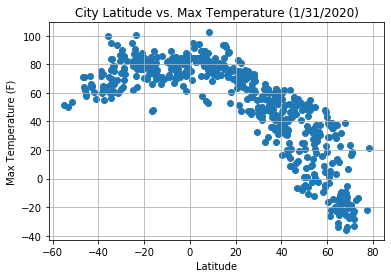

In [111]:
maxtemp = plt.figure()
plt.scatter(y = cities_df['Max Temp'], x = cities_df['Lat'])
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (1/31/2020)')
plt.grid()

#Save as PNG
maxtemp.savefig("Lat_MaxTemp.png",bbox_inches = 'tight',dpi=600)

#Explanation
# The scatterplot graphs an a strong relationship between latitude and max temperature. A high level 
# interpretation of the data is the southern hemisphere (<0 latitude) is clustered around a higher max 
# temperature while the northern hemisphere (>0 latitude) has a lower max temp.

#### Latitude vs. Humidity Plot

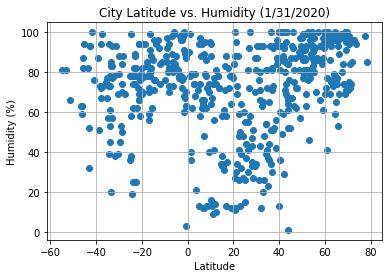

In [112]:
humidity = plt.figure()
plt.scatter(y = cities_df['Humidity'], x = cities_df['Lat'])
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (1/31/2020)')
plt.grid()

#Save as PNG
humidity.savefig("Lat_Humidity.png",bbox_inches = 'tight',dpi=600)

# Explanation
# The scatterplot does not show a clear relationship between latitude and humidity %. 

#### Latitude vs. Cloudiness Plot

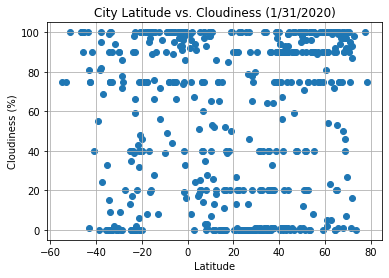

In [113]:
cloudiness = plt.figure()
plt.scatter(y = cities_df['Cloudiness'], x = cities_df['Lat'])
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (1/31/2020)')
plt.grid()

#Save as PNG
cloudiness.savefig("Lat_Cloudiness.png",bbox_inches = 'tight',dpi=600)

#Explanation
# The scatterplot does not show a clear relationship between latitude and cloudiness.
# There are visible clusters around the 0 and 100% humidity levels on both the northern and southern 
# hemisphere.

#### Latitude vs. Wind Speed Plot

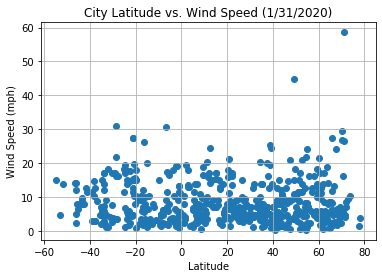

In [114]:
wind_speed = plt.figure()
plt.scatter(y = cities_df['Wind Speed'], x = cities_df['Lat'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (1/31/2020)')
plt.grid()

#Save as PNG
wind_speed.savefig("Lat_WindSpeed.png",bbox_inches = 'tight',dpi=600)

#Explanation
# There is a visible clustering around 0 to 30mph windspeed for both the northern and southern 
# hemispheres. There is not a clear directional correlation.

## Linear Regression

In [252]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregression(df, x_value, y_value, x_label, y_label):
    
    x = df[x_value]
    y = df[y_value]
    
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope*x + intercept
    plt.plot(x, regress_values,"r-")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    if df['Lat'][0] > 0: 
        plt.annotate(line_eq,xy=(0,0),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,xy=(-50,30),fontsize=15,color="red")
    plt.scatter(x,y)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    print(f"The r-squared is: {r_value**2}")
    plt.show()

In [220]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df['Lat'] >= 0]
northern_df['Cloudiness'] = northern_df['Cloudiness'].astype(float)
northern_df['Humidity'] = northern_df['Humidity'].astype(float)
northern_df = northern_df.reset_index().drop(['index'],axis=1)
northern_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Sorland,75.0,NO,1580548435,80.0,67.6670,12.6934,39.20,24.16
1,Tura,0.0,IN,1580548155,37.0,25.5198,90.2201,75.24,6.80
2,Qena,0.0,EG,1580548146,55.0,26.1615,32.7183,62.60,4.70
3,Washington,90.0,US,1580548545,62.0,47.5001,-120.5015,55.40,0.67
4,Erzin,33.0,TR,1580548145,30.0,36.9559,36.2000,53.60,6.93


In [221]:
southern_df = cities_df.loc[cities_df['Lat'] <= 0]
southern_df['Cloudiness'] = southern_df['Cloudiness'].astype(float)
southern_df['Humidity'] = southern_df['Humidity'].astype(float)
southern_df = southern_df.reset_index().drop(['index'],axis=1)
southern_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,100.0,NZ,1580548551,63.0,-46.1927,168.8643,71.01,11.99
1,Bredasdorp,90.0,ZA,1580547935,73.0,-34.5322,20.0403,75.99,5.99
2,Hobart,75.0,AU,1580548144,93.0,-42.8794,147.3294,64.99,8.05
3,Punta Arenas,75.0,CL,1580548483,81.0,-53.1500,-70.9167,50.00,4.70
4,Saldanha,0.0,ZA,1580548456,57.0,-33.0117,17.9442,75.20,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7650511694297314


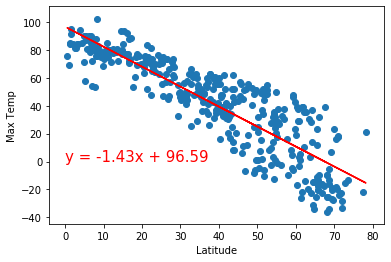

In [223]:
linregression(northern_df,'Lat','Max Temp','Latitude','Max Temp')

#Explanation
# Strong inverse correlation is visible based upon the regression. It can be interpreted as
# a location with a latitude of 10 would have a predicated max temp of (-14.3 + 96.59) or 82.29 (F). As the latitude increases, the max temp predicted decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.14468147316854393


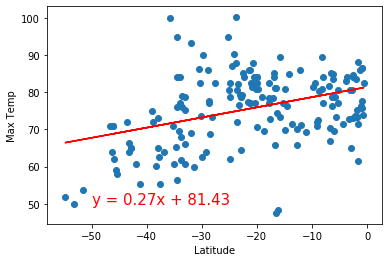

In [248]:
linregression(southern_df,'Lat','Max Temp','Latitude','Max Temp')

# Explanation
# The positive relationship is evidenced within the linear regression.
# Intepretation: As you get closer to the equator (latitude of 0), the max temp increases. A unit increase in latitude would yield a .27 F increase in temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2145882909723553


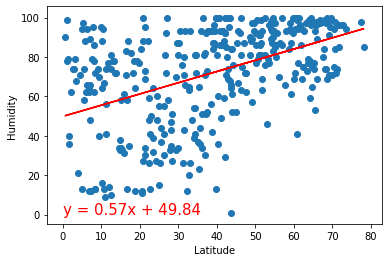

In [241]:
linregression(northern_df,'Lat','Humidity','Latitude','Humidity')

# Explanation
# Interpretation: A unit increase in latitude away from the equator, the humidity level trends upwards by .57 unit increase in humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05129737189335014


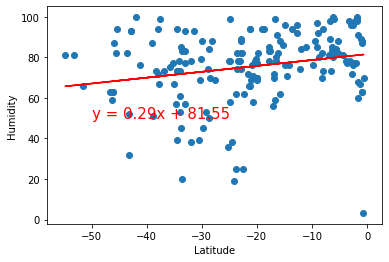

In [249]:
linregression(southern_df,'Lat','Humidity','Latitude','Humidity')

#Explanation
#Interpreation: As you get towards the equator, the humidity level increases by .29 units. 
# The positive trend in humidity is less positive in the southern hemisphere than the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08142725081786549


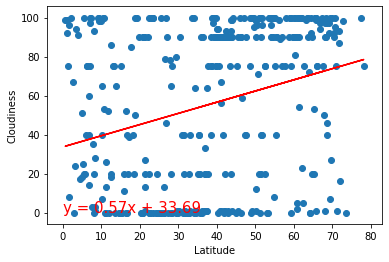

In [242]:
linregression(northern_df,'Lat','Cloudiness','Latitude','Cloudiness')

#Explanation
#Interpretation: As you get away from the equator, the cloudiness increases by .57 unit per unit increaes in latitude.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05195788906079641


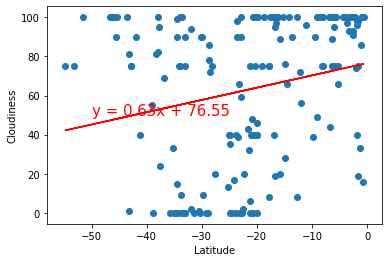

In [250]:
linregression(southern_df,'Lat','Cloudiness','Latitude','Cloudiness')

#Explanation
# Interpretation: As you get closer to the equator, the cloudiness level increases by .63 units.
# The regression trends more positive in the southern hemisphere than the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001448334462924681


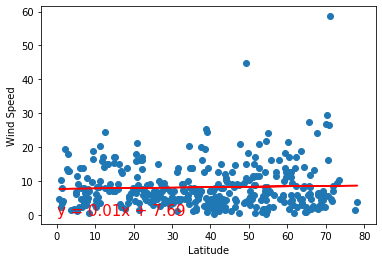

In [244]:
linregression(northern_df,'Lat','Wind Speed','Latitude','Wind Speed')

#Explanation
# Interpretation: The slope of the regression line indicates a very minimal positive change in wind speed as a function of increasing latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014828443738502319


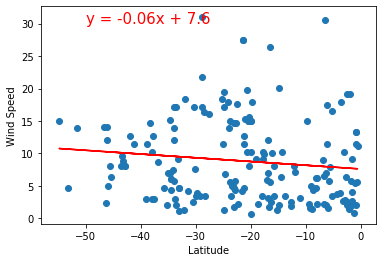

In [253]:
linregression(southern_df,'Lat','Wind Speed','Latitude','Wind Speed')

#Explanation
#Interpretation: There is a minimal negative relationship between wind speed and the latitude getting closer to the equator.